In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# import the data
df = pd.read_csv("nile.csv")
df.tail()

,year,flow,time,level,trend
55,1926,2665.916667,56,1,29
56,1927,2306.250000,57,1,30
57,1928,2495.416667,58,1,31
58,1929,3241.083333,59,1,32
59,1930,2334.416667,60,1,33


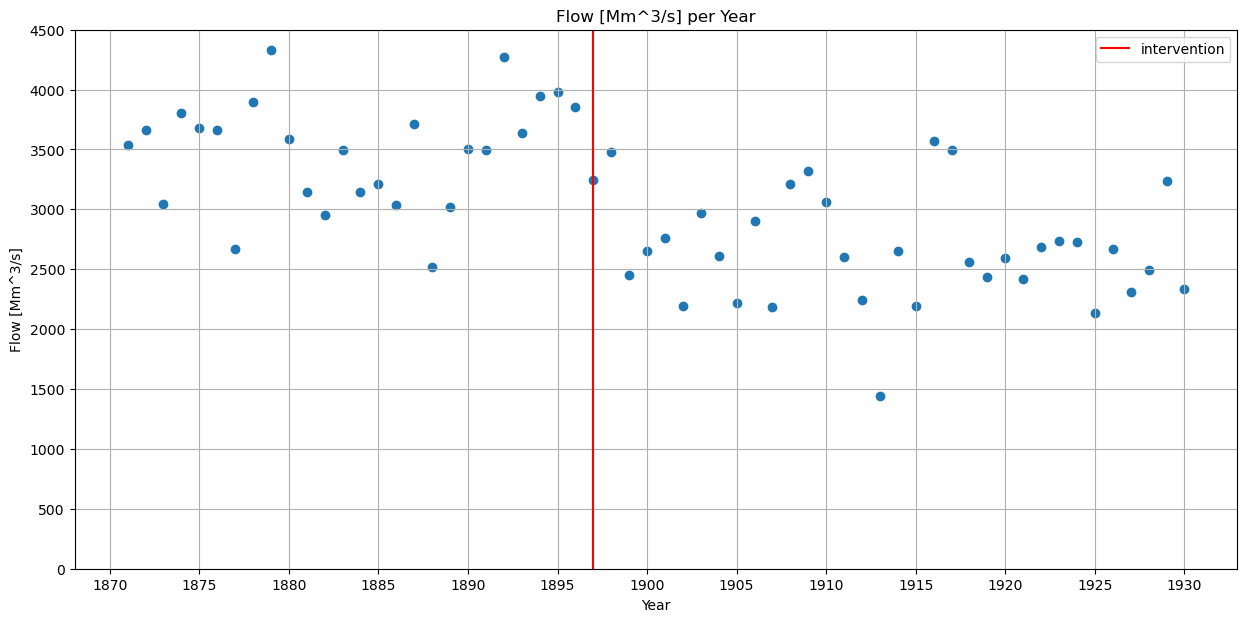

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(df["year"], df["flow"])
ax.axvline(x = 1897, color = 'r', label = 'intervention')
ax.grid(True)
plt.xticks(range(1870,1931,5))
plt.yticks(range(0,5000,500))
plt.xlabel("Year")
plt.ylabel("Flow [Mm^3/s]")
plt.title("Flow [Mm^3/s] per Year")
plt.legend()
plt.show();

In [24]:
# split data for model
X = df[["time","level","trend"]]
y = df["flow"]

In [27]:
mask = df["year"] < 1897
X_b = X[mask]
X_a = X[~mask]

time     34
level    34
trend    34
dtype: int64

In [29]:
# instantiate the model
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [32]:
y_b = lm.predict(X_b)
y_a = lm.predict(X_a)
y_a.shape

(34,)

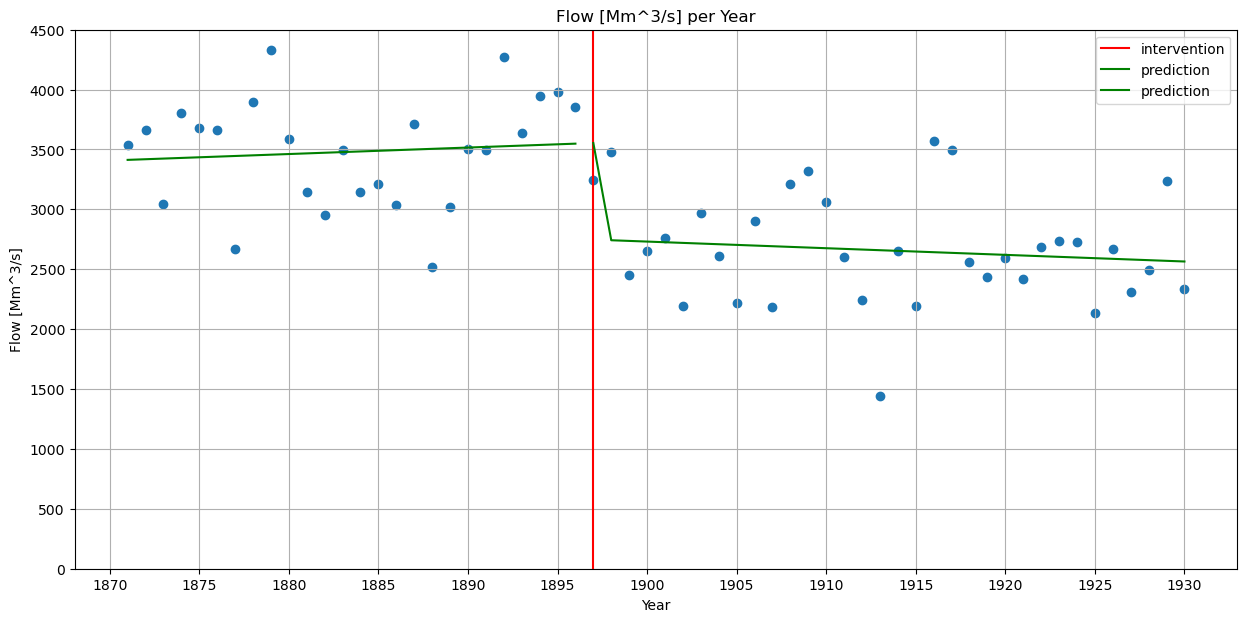

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(df["year"], df["flow"])
ax.axvline(x = 1897, color = 'r', label = 'intervention')
ax.grid(True)
ax.plot(df["year"][:26], y_b, color="green", label="prediction")
ax.plot(df["year"][26:], y_a, color="green", label="prediction")
plt.xticks(range(1870,1931,5))
plt.yticks(range(0,5000,500))
plt.xlabel("Year")
plt.ylabel("Flow [Mm^3/s]")
plt.title("Flow [Mm^3/s] per Year")
plt.legend()
plt.show();

In [37]:
model = smf.ols(formula='flow ~ time + level + trend', data=df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     16.23
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.04e-07
Time:                        15:07:25   Log-Likelihood:                -451.14
No. Observations:                  60   AIC:                             910.3
Df Residuals:                      56   BIC:                             918.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3407.9368    182.696     18.654      0.0

Text(0, 0.5, 'Flow [Mm^3/s]')

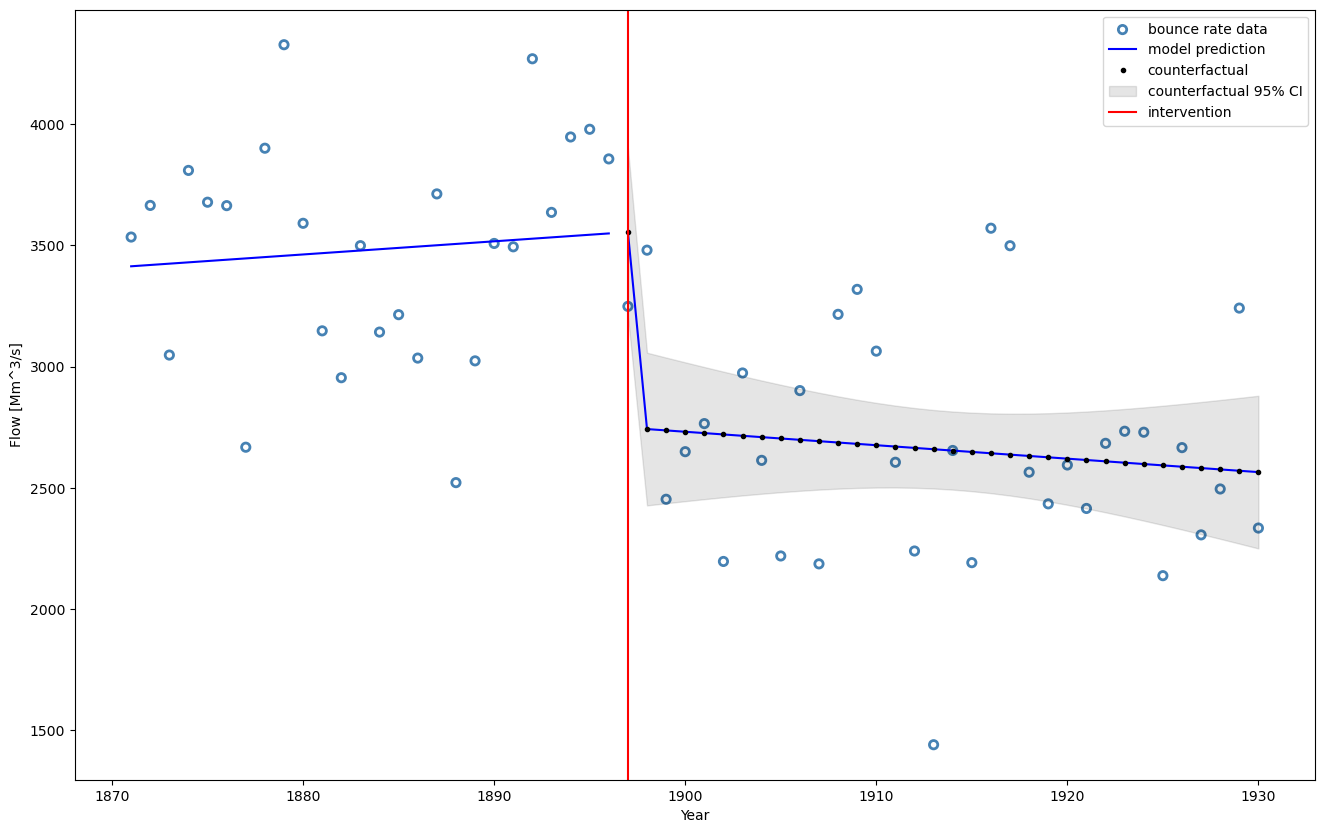

In [47]:
start = 26
end = 60
beta = res.params

# Get model predictions and 95% confidence interval
predictions = res.get_prediction(X)
summary = predictions.summary_frame(alpha=0.05)

# mean predictions
y_pred = predictions.predicted_mean

# countefactual assumes no interventions
cf_df = df.copy()
cf_df["D"] = 0.0
cf_df["P"] = 0.0

# counter-factual predictions
cf = res.get_prediction(cf_df).summary_frame(alpha=0.05)

# Plotting
#plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(16,10))

# Plot bounce rate data
ax.scatter(df["year"], df["flow"], facecolors='none', edgecolors='steelblue', label="bounce rate data", linewidths=2)

# Plot model mean bounce rate prediction
ax.plot(df["year"][:start], y_pred[:start], 'b-', label="model prediction")
ax.plot(df["year"][start:], y_pred[start:], 'b-')

# Plot counterfactual mean bounce rate with 95% confidence interval
ax.plot(df["year"][start:], cf['mean'][start:], 'k.', label="counterfactual")
ax.fill_between(df["year"][start:], cf['mean_ci_lower'][start:], cf['mean_ci_upper'][start:], color='k', alpha=0.1, label="counterfactual 95% CI");

# Plot line marking intervention moment
ax.axvline(x = 1897, color = 'r', label = 'intervention')

ax.legend(loc='best')
#plt.ylim([10, 15])
plt.xlabel("Year")
plt.ylabel("Flow [Mm^3/s]")

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

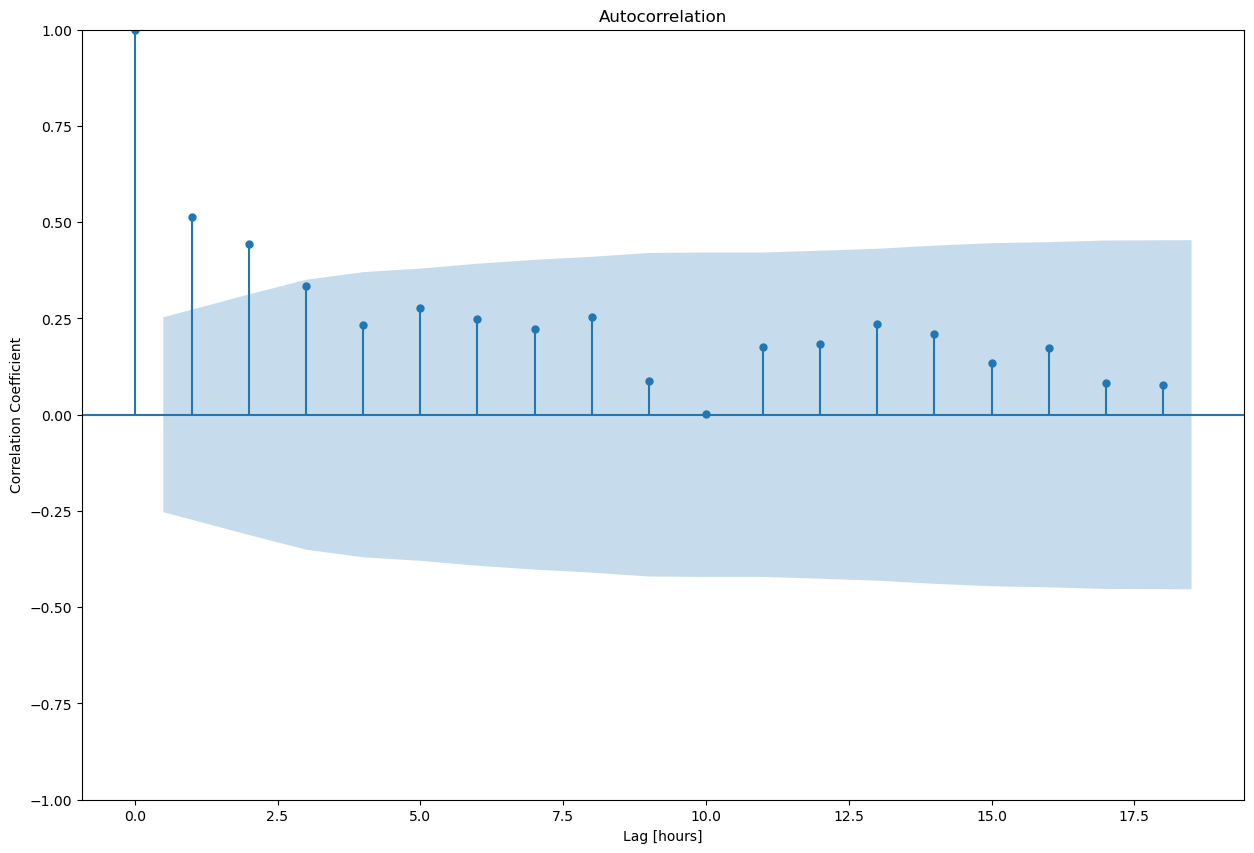

In [49]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_acf(df["flow"],ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");